In [105]:
from GapFill_2014_CBI_WL import *

filepath = r'D:\rprocious\PSM Lighthouse\CBI\data 2\lighthouse\Port Isabel\PortIsabel_2013-2023_pwl_harmwl_bwl.csv'
 #input('Insert Filepath to Water Level Dataset: ')

try:
    # Call the gap-filling function
    filled_df, wl_dataset, all_gaps, dataset_LF, poly_wl, filled_gap_list, adjusted_gaps = cbi_gapfill(filepath)
    print("Gap filling completed. Here's a preview of the data:")
    print(filled_df.head())
    print(wl_dataset.head())
except FileNotFoundError:
    print(f"Error: File not found at the given path: {filepath}")
except Exception as e:
    if str(e) == 'No objects to concatenate':
        print('No gaps with back up water levels avaliable, try another method')
    else:
        print(f"An error occurred: {e}, please try again")



Reading dataset
Gaps Created
Total number of gaps:  811
Number of Linear Gaps filled: 198
Single gaps filled
167
Number of gaps with backup water level: 167
Gaps filled 167
Gap filling completed. Here's a preview of the data:
                 date    pwl    bwl  harmwl  pwl surge  bwl surge  mwl  \
0 2013-01-01 00:00:00  1.611  1.961   1.513      0.098      0.448  NaN   
1 2013-01-01 00:06:00  1.611  1.961   1.516      0.095      0.445  NaN   
2 2013-01-01 00:12:00  1.613  1.959   1.518      0.095      0.441  NaN   
3 2013-01-01 00:18:00  1.618  1.965   1.521      0.097      0.444  NaN   
4 2013-01-01 00:24:00  1.625  1.969   1.523      0.102      0.446  NaN   

   mwl adjusted  new wl adjustment  new wl  
0           NaN              1.611   1.611  
1           NaN              1.611   1.611  
2           NaN              1.613   1.613  
3           NaN              1.618   1.618  
4           NaN              1.625   1.625  
                 date    pwl    bwl  harmwl  pwl surge  bwl

In [106]:
filled_df['pwl actual'] = wl_dataset['pwl']
filled_df['error'] = abs((filled_df['mwl'] - filled_df['pwl actual']) / filled_df['pwl actual']) *100
filled_df['adjusted error'] = abs((filled_df['mwl adjusted'] - filled_df['pwl actual']) / filled_df['pwl actual']) *100
filled_df['difference'] = abs(filled_df['pwl actual'] - filled_df['mwl'])
filled_df

,date,pwl,bwl,harmwl,pwl surge,bwl surge,mwl,mwl adjusted,new wl adjustment,new wl,pwl actual,error,adjusted error,difference
0,2013-01-01 00:00:00,1.611,1.961,1.513,0.098,0.448,NaN,NaN,1.611,1.611,1.611,NaN,NaN,NaN
1,2013-01-01 00:06:00,1.611,1.961,1.516,0.095,0.445,NaN,NaN,1.611,1.611,1.611,NaN,NaN,NaN
2,2013-01-01 00:12:00,1.613,1.959,1.518,0.095,0.441,NaN,NaN,1.613,1.613,1.613,NaN,NaN,NaN
3,2013-01-01 00:18:00,1.618,1.965,1.521,0.097,0.444,NaN,NaN,1.618,1.618,1.618,NaN,NaN,NaN
4,2013-01-01 00:24:00,1.625,1.969,1.523,0.102,0.446,NaN,NaN,1.625,1.625,1.625,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964075,2023-12-31 23:30:00,1.440,0.786,1.428,0.012,-0.642,NaN,NaN,1.440,1.440,1.440,NaN,NaN,NaN
964076,2023-12-31 23:36:00,1.445,0.789,1.434,0.011,-0.645,NaN,NaN,1.445,1.445,1.445,NaN,NaN,NaN
964077,2023-12-31 23:42:00,1.451,0.793,1.440,0.011,-0.647,NaN,NaN,1.451,1.451,1.451,NaN,NaN,NaN
964078,2023-12-31 23:48:00,1.458,0.796,1.446,0.012,-0.650,NaN,NaN,1.458,1.458,1.458,NaN,NaN,NaN


In [107]:
filled_df.describe()

,date,pwl,bwl,harmwl,pwl surge,bwl surge,mwl,mwl adjusted,new wl adjustment,new wl,pwl actual,error,adjusted error,difference
count,964080,807947.000000,789075.000000,964080.000000,819073.000000,789075.000000,11232.000000,11069.000000,819016.000000,819016.000000,819073.000000,10619.000000,10456.000000,10619.000000
mean,2018-07-02 11:57:00.000001792,1.582410,0.938905,1.461513,0.123189,-0.518998,1.551794,1.520965,1.581579,1.581993,1.582283,0.720510,25.502297,0.010860
min,2013-01-01 00:00:00,0.852000,0.000000,0.902000,-0.292000,-1.774000,-22.509103,-22.737401,-22.737401,-22.509103,0.852000,0.000196,0.001437,0.000003
25%,2015-10-02 05:58:30,1.454000,0.811000,1.359000,0.042000,-0.623000,1.430719,1.251581,1.453000,1.454000,1.454000,0.140847,9.340031,0.002207
50%,2018-07-02 11:57:00,1.587000,0.911000,1.483000,0.116000,-0.562000,1.564531,1.597776,1.587000,1.587000,1.587000,0.294241,17.802236,0.004629
75%,2021-04-01 17:55:30,1.711000,1.009000,1.578000,0.193000,-0.491000,1.688111,1.867523,1.712000,1.710000,1.710000,0.556271,38.219721,0.008465
max,2023-12-31 23:54:00,5.659000,2.155000,1.864000,4.582000,0.725000,2.094497,2.935764,5.659000,5.659000,5.659000,227.071516,199.378251,3.798906
std,NaN,0.222178,0.241759,0.160544,0.156183,0.221551,0.405546,0.631514,0.232671,0.225736,0.221753,3.103533,20.753598,0.050130


In [108]:
filled_df['difference'].idxmax()

534541

In [109]:
rms = np.sqrt(np.nanmean(np.square(filled_df['error'])))
rms

3.185928835868392

In [113]:
filled_df[534530:534551]

,date,pwl,bwl,harmwl,pwl surge,bwl surge,mwl,mwl adjusted,new wl adjustment,new wl,pwl actual,error,adjusted error,difference
534530,2019-02-06 05:00:00,NaN,0.973,1.468,0.224,-0.495,1.683891,2.118050,2.118050,1.683891,1.692,0.479237,25.180238,0.008109
534531,2019-02-06 05:06:00,NaN,0.971,1.467,0.222,-0.496,1.681132,2.117941,2.117941,1.681132,1.689,0.465818,25.396132,0.007868
534532,2019-02-06 05:12:00,NaN,0.980,1.467,0.234,-0.487,1.693548,2.133006,2.133006,1.693548,1.701,0.438118,25.397175,0.007452
534533,2019-02-06 05:18:00,NaN,0.988,1.467,0.243,-0.479,1.704580,2.146688,2.146688,1.704580,1.710,0.316970,25.537319,0.005420
534534,2019-02-06 05:24:00,NaN,0.906,1.466,0.136,-0.560,1.591883,2.036641,2.036641,1.591883,1.602,0.631548,27.131145,0.010117
534535,2019-02-06 05:30:00,NaN,0.968,1.466,0.220,-0.498,1.676994,2.124402,2.124402,1.676994,1.686,0.534155,26.002519,0.009006
534536,2019-02-06 05:36:00,NaN,0.964,1.466,0.215,-0.502,1.671477,2.121536,2.121536,1.671477,1.681,0.566482,26.206768,0.009523
534537,2019-02-06 05:42:00,NaN,0.965,1.466,0.218,-0.501,1.672856,2.125565,2.125565,1.672856,1.684,0.661729,26.221189,0.011144
534538,2019-02-06 05:48:00,NaN,0.974,1.466,0.225,-0.492,1.685271,2.140629,2.140629,1.685271,1.691,0.338805,26.589541,0.005729
534539,2019-02-06 05:54:00,NaN,0.939,1.466,0.179,-0.527,1.637052,2.095061,2.095061,1.637052,1.645,0.483143,27.359309,0.007948


Text(0.5, 1.0, 'Filled gap')

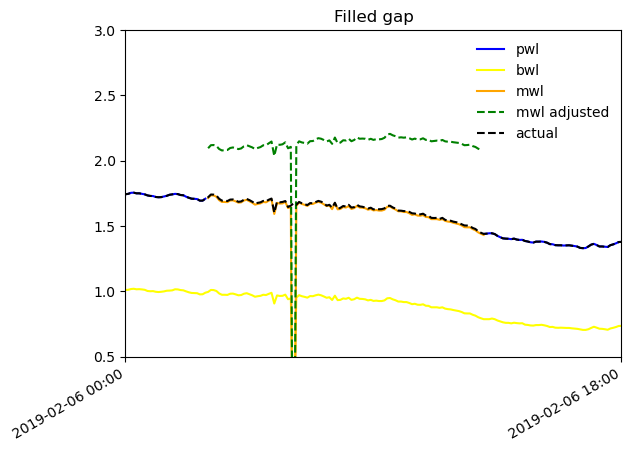

In [120]:
plt.plot(filled_df['date'], filled_df['pwl'], color = 'blue', label = 'pwl')
plt.plot(filled_df['date'], filled_df['bwl'], color = 'yellow', label = 'bwl')
plt.plot(filled_df['date'],filled_df['mwl'], color = 'orange', label = 'mwl')#, linestyle = 'dashed')
plt.plot(filled_df['date'],filled_df['mwl adjusted'], color = 'green', label = 'mwl adjusted', linestyle = 'dashed')
plt.plot(filled_df['date'],filled_df['pwl actual'], color = 'black', label = 'actual', linestyle = 'dashed')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(0.5,3)

start_date = pd.to_datetime('2019-02-06 00:00:00')

end_date = pd.to_datetime('2019-02-06 18:00:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Filled gap')

In [112]:
len(adjusted_gaps)

167